In [ ]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('best_model_finetune.keras')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet101           │ (None, 7, 7,      │ 42,658,176 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet101[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │      2,049 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 51,595,653 (196.82 MB)

 Trainable params: 4,467,713 (17.04 MB)

 Non-trainable params: 38,192,512 (145.69 MB)

 Optimizer params: 8,935,428 (34.09 MB)

In [9]:
import tensorflow as tf
import numpy as np

# Set the path to the new image
image_path = "Validation/Cancer/IMG (19)_Fliplr.jpg" 

In [10]:
# Load and preprocess the image
img = tf.io.read_file(image_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, (224, 224))  # Resize to match the model's expected input size
img = tf.keras.applications.resnet.preprocess_input(img)  # Preprocessing for ResNet

# Add a batch dimension
img = tf.expand_dims(img, axis=0)

In [11]:
img.shape

TensorShape([1, 224, 224, 3])

In [ ]:
# Make prediction
pred = model.predict(img)

# Since the model uses a sigmoid activation, the output is a probability.
# Adjust the threshold as needed (default 0.5 here).
if pred[0] > 0.5: # here positive class(1) is normal and 0 is cancer, because of the alphabetical thing; thus pred[0] = prob that it belongs to normal
    print("Prediction: Normal")
else:
    print("Prediction: Cancer")

print("Prediction score:", pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Prediction: Cancer
Prediction score: [0.11766935]


In [14]:
pred

array([[0.11766935]], dtype=float32)

In [15]:
def predict_image(model, image_path, threshold=0.5):
    """
    Loads an image from the given path, preprocesses it, and uses the model to predict.
    
    Parameters:
      model: The pre-trained Keras model.
      image_path: Path to the image file.
      threshold: Decision threshold for classification.
      
    Returns:
      A tuple (prediction, score) where:
        - prediction: A string "Normal" or "Cancer".
        - score: The probability score from the model.
    """
    # Load and preprocess the image
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))  # Resize to match the model's expected input size
    img = tf.keras.applications.resnet.preprocess_input(img)  # Preprocessing for ResNet
    
    # Add a batch dimension
    img = tf.expand_dims(img, axis=0)
    
    # Make prediction
    pred = model.predict(img)
    score = pred[0][0]  # Extract probability from prediction array

    # Since the model uses a sigmoid activation,
    # pred[0] represents the probability that the image belongs to the "Normal" class (due to alphabetical order)
    if score > threshold:
        prediction = "Normal"
    else:
        prediction = "Cancer"
    
    print("Prediction:", prediction)
    print("Prediction score:", score)
    
    return prediction, score

In [ ]:
predict_image(model, "Validation/Non-Cancer/IMG (616).jpg") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Prediction: Normal
Prediction score: 0.9985678


('Normal', np.float32(0.9985678))

In [17]:
predict_image(model, "Validation/Non-Cancer/IMG (597).jpg") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Prediction: Normal
Prediction score: 0.9867531


('Normal', np.float32(0.9867531))

In [19]:
predict_image(model, "Validation/Cancer/IMG (3).jpg") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Prediction: Cancer
Prediction score: 0.39748764


('Cancer', np.float32(0.39748764))

In [21]:
predict_image(model, "Validation/Cancer/IMG (102).jpg") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Prediction: Cancer
Prediction score: 0.26783967


('Cancer', np.float32(0.26783967))

### With Confidence score

In [22]:
import tensorflow as tf

def predict_image(model, image_path, threshold=0.5):
    """
    Loads an image from the given path, preprocesses it, and uses the model to predict.
    
    Parameters:
      model: The pre-trained Keras model.
      image_path: Path to the image file.
      threshold: Decision threshold for classification.
      
    Returns:
      A tuple (prediction, confidence) where:
        - prediction: A string "Normal" or "Cancer".
        - confidence: The confidence of the prediction as a fraction (0 to 1).
    """
    # Load and preprocess the image
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))  # Resize to match the model's expected input size
    img = tf.keras.applications.resnet.preprocess_input(img)  # Preprocessing for ResNet
    
    # Add a batch dimension
    img = tf.expand_dims(img, axis=0)
    
    # Make prediction
    pred = model.predict(img)
    score = pred[0][0]  # Extract probability from prediction array
    
    # Determine prediction and confidence based on threshold
    if score > threshold:
        prediction = "Normal"
        confidence = score  # Confidence for Normal class
    else:
        prediction = "Cancer"
        confidence = 1 - score  # Confidence for Cancer class

    print("Prediction:", prediction)
    print("Confidence: {:.2f}%".format(confidence * 100))
    
    return prediction, confidence

In [24]:
predict_image(model, "Validation/Non-Cancer/IMG (12).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Prediction: Normal
Confidence: 82.92%


('Normal', np.float32(0.8291503))

In [ ]:
predict_image(model, "Validation/Cancer/IMG (50)_AdditiveGaussianNoise.jpg") ## WRONG

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Prediction: Normal
Confidence: 85.24%


('Normal', np.float32(0.8523986))

In [28]:
predict_image(model, "Validation/Cancer/IMG (50)_LinearContrast.jpg") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Prediction: Cancer
Confidence: 86.97%


('Cancer', np.float32(0.8696964))

### For full test data

In [30]:
import os
from tqdm import tqdm
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming your finalized predict_image function is defined as:
def predict_image(model, image_path, threshold=0.5):
    # Load and preprocess the image
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))  # Resize to match the model's expected input size
    img = tf.keras.applications.resnet.preprocess_input(img)  # Preprocessing for ResNet
    
    # Add a batch dimension
    img = tf.expand_dims(img, axis=0)
    
    # Make prediction
    pred = model.predict(img)
    score = pred[0][0]  # Extract probability from prediction array

    # Since the model uses a sigmoid activation,
    if score > threshold:
        prediction = "Normal"
    else:
        prediction = "Cancer"
    return prediction, score

In [32]:
# Path to the validation folder
validation_dir = "Validation"

# Mapping: folders to ground truth labels as used by predict_image()
# Here, images in "Non-Cancer" folder are actually Normal.
label_mapping = {
    "Cancer": "Cancer",
    "Non-Cancer": "Normal"
}

y_true = []
y_pred = []

# Loop over each class folder in the validation directory
for folder in os.listdir(validation_dir):
    class_dir = os.path.join(validation_dir, folder)
    if os.path.isdir(class_dir):
        # Process each image in this folder with a progress bar
        for file_name in os.listdir(class_dir):
            if file_name.lower().endswith('.jpg'):
                file_path = os.path.join(class_dir, file_name)
                # Get the ground truth label based on the folder name
                ground_truth = label_mapping.get(folder, folder)
                # Use the predict_image function to get the prediction
                pred_label, score = predict_image(model, file_path)
                y_true.append(ground_truth)
                y_pred.append(pred_label)

# Print a classification report for detailed metrics
print('complted the prediction')
print(classification_report(y_true, y_pred, target_names=["Cancer", "Normal"]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

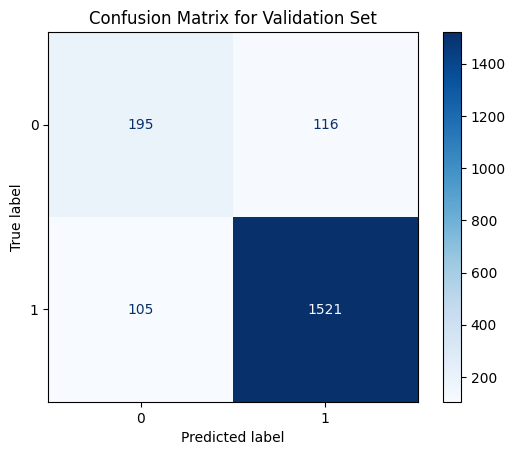

In [33]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["Cancer", "Normal"])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Validation Set")
plt.show()